In [3]:
import os
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from biosppy.signals import ppg
import heartpy as hp

Load Data

In [4]:
def load_data(dir):
    data = []
    for file in os.listdir(dir):
        if file.endswith(".csv"):
            print(os.path.join(dir, file))
            df = pd.read_csv(os.path.join(dir, file),on_bad_lines='skip')
            if not df.empty:
                data.append(df)
    return data


try:
    Group1 = load_data("/mnt/ArtHeart/Data/Group 1")
    Group2 = load_data("/mnt/ArtHeart/Data/Group 2")
    Group3 = load_data("/mnt/ArtHeart/Data/Group 3")
except:
    try:
        Group1 = load_data("Data/Group 1")
        Group2 = load_data("Data/Group 2")
        Group3 = load_data("Data/Group 3")
    except:
        Group1 = load_data("W:\PhD\ArtHeart\Data\Group 1")
        Group2 = load_data("W:\PhD\ArtHeart\Data\Group 2")
        Group3 = load_data("W:\PhD\ArtHeart\Data\Group 3")




W:\PhD\ArtHeart\Data\Group 1\1.csv
W:\PhD\ArtHeart\Data\Group 1\10.csv
W:\PhD\ArtHeart\Data\Group 1\11.csv
W:\PhD\ArtHeart\Data\Group 1\12.csv
W:\PhD\ArtHeart\Data\Group 1\13.csv
W:\PhD\ArtHeart\Data\Group 1\14.csv
W:\PhD\ArtHeart\Data\Group 1\15.csv
W:\PhD\ArtHeart\Data\Group 1\16.csv
W:\PhD\ArtHeart\Data\Group 1\17.csv
W:\PhD\ArtHeart\Data\Group 1\18.csv
W:\PhD\ArtHeart\Data\Group 1\19.csv
W:\PhD\ArtHeart\Data\Group 1\2.csv
W:\PhD\ArtHeart\Data\Group 1\20.csv
W:\PhD\ArtHeart\Data\Group 1\21.csv
W:\PhD\ArtHeart\Data\Group 1\22.csv
W:\PhD\ArtHeart\Data\Group 1\23.csv
W:\PhD\ArtHeart\Data\Group 1\24.csv
W:\PhD\ArtHeart\Data\Group 1\25.csv
W:\PhD\ArtHeart\Data\Group 1\26.csv
W:\PhD\ArtHeart\Data\Group 1\27.csv
W:\PhD\ArtHeart\Data\Group 1\28.csv
W:\PhD\ArtHeart\Data\Group 1\29.csv
W:\PhD\ArtHeart\Data\Group 1\3.csv
W:\PhD\ArtHeart\Data\Group 1\30.csv
W:\PhD\ArtHeart\Data\Group 1\31.csv
W:\PhD\ArtHeart\Data\Group 1\32.csv
W:\PhD\ArtHeart\Data\Group 1\33.csv
W:\PhD\ArtHeart\Data\Group 1\34

Starting with withing group comparisons

In [5]:
def interpolate_nan(data):
    for i in range(len(data)):
        df = data[i]
        df['UTC'] = df['UTC'].interpolate()
        data[i] = df
    return data


def cut_to_common_length(data):

    # Interpolate NaN values
    data = interpolate_nan(data)

    # Find the shortest dataframe
    shortest_df = min(data, key=lambda x: len(x))

    # Find the first value of UTC in the shortest dataframe that isn't NaN
    first_utc = shortest_df['UTC'].first_valid_index()
    first_utc_value = shortest_df['UTC'][first_utc]

    # Find the length of the dataframe from that point to the end
    length = len(shortest_df.loc[first_utc:])

    # Cut all dataframes to the same length and reset the index
    for i in range(len(data)):
        df = data[i]

        if first_utc_value in df['UTC'].values:
            match_utc_index = df[df['UTC'] == first_utc_value].index[0]
        else:
            match_utc_index = df.iloc[(df['UTC']-first_utc_value).abs().argsort()[:1]].index[0]

        df = df.loc[match_utc_index:].iloc[:length].reset_index(drop=True)
        data[i] = df
    return data




Group1 = cut_to_common_length(Group1)
Group2 = cut_to_common_length(Group2)
Group3 = cut_to_common_length(Group3)
 
sample_rate = 24

    


In [6]:
print(len(Group1))
print(len(Group2))
print(len(Group3))

print(Group1[0].shape)
print(Group1[1].shape)

37
39
32
(143904, 6)
(143904, 6)


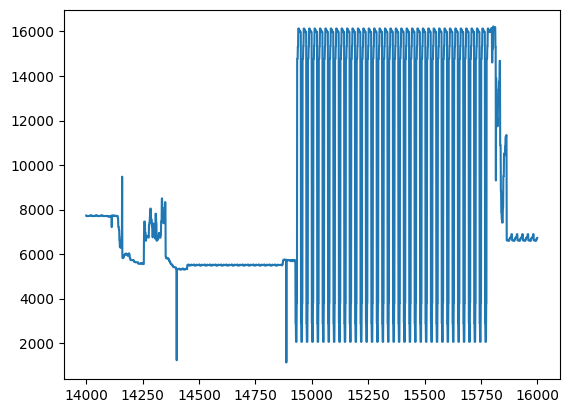

In [7]:

df = Group1[0]


plt.plot(df['DATA'][14000:16000])
plt.show()


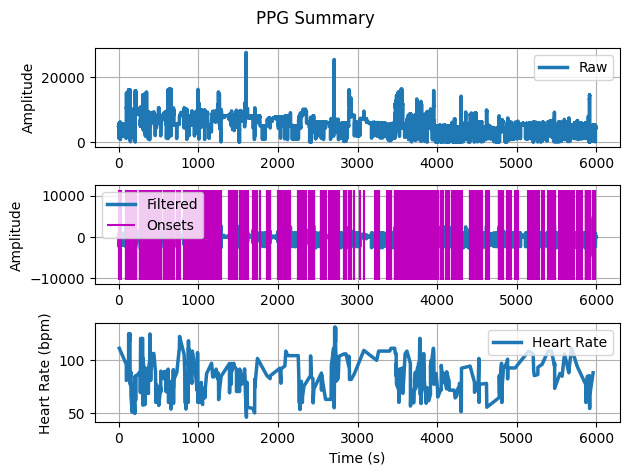

ReturnTuple(ts=array([0.00000000e+00, 4.16663771e-02, 8.33327542e-02, ...,
       5.99583333e+03, 5.99587500e+03, 5.99591667e+03]), filtered=array([ 0.39520087,  2.77491326, 13.16107977, ...,  1.52833348,
        3.08190362,  0.21567981]), onsets=array([   180,    193,    491, ..., 142979, 142993, 143713]), heart_rate_ts=array([   8.04161078,   96.04099927,   96.95765956,  123.6658073 ,
        124.16580382,  124.70746673,  125.16579687,  125.70745978,
        126.16578992,  126.70745283,  127.16578298,  127.70744588,
        128.16577603,  128.70743893,  129.16576908,  129.70743198,
        130.16576213,  130.70742503,  131.16575518,  131.70741808,
        132.16574823,  132.70741113,  133.16574128,  133.70740418,
        134.16573433,  134.70739723,  135.16572738,  135.70739029,
        136.16572043,  136.70738334,  137.16571348,  137.70737639,
        138.16570654,  138.70736944,  139.16569959,  139.70736249,
        140.16569264,  140.70735554,  141.16568569,  141.70734859,
       

In [8]:
ppg.ppg(signal=Group1[0]['DATA'], sampling_rate=sample_rate, show=True)

In [9]:
def ppg_calc(data):
    data_return = []
    for i in range(len(data)):
        df = data[i]
        data_return.append(ppg.ppg(signal=df['DATA'], sampling_rate=24, show=False))
    return data_return

Group1 = ppg_calc(Group1)
Group2 = ppg_calc(Group2)
Group3 = ppg_calc(Group3)

In [10]:
def calc_med_hr(data):
    med_hr = []
    for i in range(len(data)):
        arr = data[i]
        med_hr.append(np.median(arr[4]))

    med_hr = np.median(med_hr)

    return med_hr

Group1_med_hr = calc_med_hr(Group1)
Group2_med_hr = calc_med_hr(Group2)
Group3_med_hr = calc_med_hr(Group3)

print("Group 1 Median HR: " + str(Group1_med_hr))
print("Group 2 Median HR: " + str(Group2_med_hr))
print("Group 3 Median HR: " + str(Group3_med_hr))


Group 1 Median HR: 73.11355311355311
Group 2 Median HR: 71.50692785475394
Group 3 Median HR: 72.03729603729603


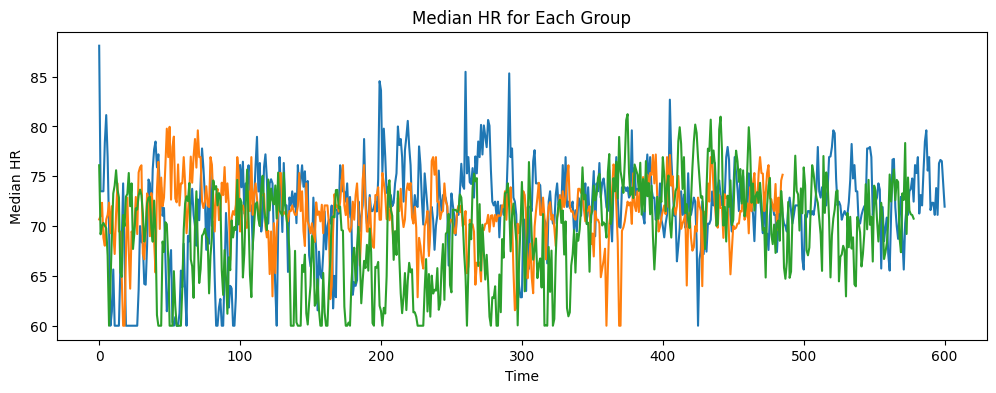

In [11]:

def cut_to_common_length(data, time):
    # Find the shortest dataframe
    shortest_time = min(time, key=len)
    shortest_index = np.argmin([len(t) for t in time])

    # Find the first value of time in the shortest array that isn't NaN
    first_time = shortest_time[~np.isnan(shortest_time)][0]

    # Find the length of the array from that point to the end
    length = len(shortest_time[shortest_time >= first_time])

    # Cut all arrays to the same length
    for i in range(len(data)):
        arr = data[i]
        t = time[i]

        # Find the index of the first matching time value
        if first_time in t:
            match_index = np.where(t == first_time)[0][0]
        else:
            match_index = np.argmin(np.abs(t - first_time))

        # Cut the array to the same length as the shortest array
        arr = arr[match_index:match_index+length]
        data[i] = arr

    return data


def group_median_hr(data):
    dat = []
    time = []
    
    for i in range(len(data)):
        df = data[i]
        dat.append(df[4])
        time.append(df[3])
    dat = cut_to_common_length(dat, time) 
    dat = np.array(dat)
    medians = np.median(dat, axis=0)
    return medians


Group1_med_hr = group_median_hr(Group1)
Group2_med_hr = group_median_hr(Group2)
Group3_med_hr = group_median_hr(Group3)

import matplotlib.pyplot as plt

# Plot median HR for each group
plt.figure(figsize=(12,4))
plt.plot(Group1_med_hr, label='Group 1')
plt.plot(Group2_med_hr, label='Group 2')
plt.plot(Group3_med_hr, label='Group 3')
plt.title('Median HR for Each Group')
plt.xlabel('Time')
plt.ylabel('Median HR')
plt.show()


c:\Users\Tom\.conda\envs\tfconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


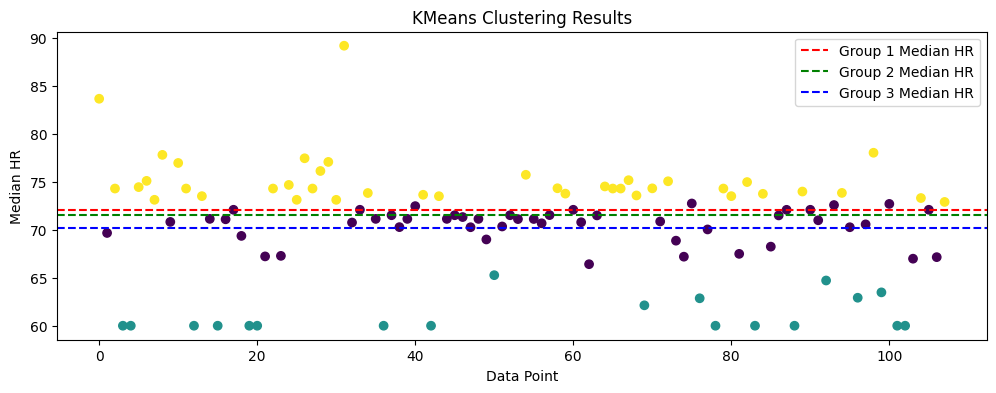

In [21]:
from sklearn.cluster import KMeans

def median_hr(data):
    dat = []
    time = []
    
    for i in range(len(data)):
        df = data[i]
        dat.append(df[4])
        time.append(df[3])
    dat = cut_to_common_length(dat, time) 
    dat = np.array(dat)
    dat = np.median(dat, axis=1)
    return dat


# Combine all data into a single array
combined_list = []
combined_list.extend(Group1)
combined_list.extend(Group2)
combined_list.extend(Group3)

data = median_hr(combined_list)

data = np.array(data).reshape(-1, 1)

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Plot the clustering results
plt.figure(figsize=(12,4))
plt.scatter(range(len(data)), data, c=kmeans.labels_)
plt.title('KMeans Clustering Results')
plt.xlabel('Data Point')
plt.ylabel('Median HR')


# Display median HR for each group
single_med_hr_group1 = np.median(Group1_med_hr)
single_med_hr_group2 = np.median(Group2_med_hr)
single_med_hr_group3 = np.median(Group3_med_hr)

plt.axhline(y=single_med_hr_group1, color='r', linestyle='--', label='Group 1 Median HR')
plt.axhline(y=single_med_hr_group2, color='g', linestyle='--', label='Group 2 Median HR')
plt.axhline(y=single_med_hr_group3, color='b', linestyle='--', label='Group 3 Median HR')

plt.legend()
plt.show()


In [13]:
from tslearn.clustering import TimeSeriesKMeans


def get_data(data):
    dat = []
    time = []
    for i in range(len(data)):
        df = data[i]
        dat.append(df[1])
        time.append(df[0])
        
    dat = cut_to_common_length(dat, time)
        
    return dat



# Combine all data into a single array
combined_list = []
combined_list.extend(Group1)
combined_list.extend(Group2)
combined_list.extend(Group3)

data = get_data(combined_list)

data = np.array(data)

# A set of time series should be formatted as a three-dimensional array with shape (num_series, max_length, 1)
data = data.reshape((data.shape[0], data.shape[1], 1))

# Define the number of clusters
n_clusters = 3

# Create a KMeans object and fit the data
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=10, n_jobs=4).fit(data)

# Get the labels for each data point
labels = kmeans.labels_

# Separate the data into the original groups
Group1_labels = labels[:len(Group1)]
Group2_labels = labels[len(Group1):len(Group1)+len(Group2)]
Group3_labels = labels[len(Group1)+len(Group2):]

# Print the number of data points in each cluster for each group
print("Group 1 Cluster Counts: ", np.bincount(Group1_labels))
print("Group 2 Cluster Counts: ", np.bincount(Group2_labels))
print("Group 3 Cluster Counts: ", np.bincount(Group3_labels))


MemoryError: Unable to allocate 60.3 GiB for an array with shape (89928, 89928) and data type float64